In [32]:
from ultralytics import YOLO
import cv2
import os
import numpy as np

In [33]:
base_path = '../'

In [34]:
model = YOLO('/home/ec2-user/hubmap-hacking-the-human-vasculature/project_yolo/runs/segment/train/weights/best.pt')  # load a custom model

In [46]:
# helper function for data visualization
def visualize(**images):
    """PLot images in one row."""
    n = len(images)
    plt.figure(figsize=(16, 5))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        plt.imshow(image)
    plt.show()
def load_img(img_dir, img_id):
  img = cv2.imread(f"{img_dir}/{img_id}.png")
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img
def get_annotated_img(imgs_dir, annots_dir, base_img_id, fill_outline=False):
  eps = 1
  annotated_image_coco = load_img(imgs_dir, base_img_id)
  img_height, img_width, _ = annotated_image_coco.shape
  with open(f'{annots_dir}/{base_img_id}.pkl', 'rb') as f:
    tgt_annots = pickle.load(f)
  for tgt_annot in tgt_annots:
    coords = [[x, y] for x, y in zip(tgt_annot['segmentation'][0][::2], tgt_annot['segmentation'][0][1::2])]
    min_x, min_y, width, height = tgt_annot['bbox']
    if fill_outline:
        cv2.polylines(annotated_image_coco, [np.array(coords)], True, (0, 255, 0), 2)
    else:
        cv2.fillPoly(annotated_image_coco, pts=[np.array(coords)], color=(0,255,0))
    top_left = (int(tgt_annot['bbox'][0]), int(tgt_annot['bbox'][1]))
    min_x = min(coords, key=lambda x: x[0])[0]
    min_y = min(coords, key=lambda x: x[1])[1]
    max_x = max(coords, key=lambda x: x[0])[0]
    max_y = max(coords, key=lambda x: x[1])[1]
    bottom_right = (int(tgt_annot['bbox'][0]+tgt_annot['bbox'][2]), int(tgt_annot['bbox'][1]+tgt_annot['bbox'][3]))
#     if min_x <= eps or max_x >= img_width-eps or min_y <= eps or max_y >= img_height-eps:
#       annotated_image_coco = cv2.rectangle(annotated_image_coco, top_left, bottom_right, (255,0,0), 2)
#     annotated_image_coco = cv2.rectangle(annotated_image_coco, top_left, bottom_right, (255,0,0), 2)
  annotated_image_coco = add_border(annotated_image_coco, 5, (0,0,255))
#   plt.imshow(annotated_image_coco)
#   plt.show()
  return annotated_image_coco
def add_border(image, border_size, border_color):
    height, width = image.shape[:2]
    new_height = height + 2 * border_size
    new_width = width + 2 * border_size
    bordered_image = np.zeros((new_height, new_width, 3), dtype=np.uint8)
    bordered_image[border_size:height + border_size, border_size:width + border_size] = image
    cv2.rectangle(bordered_image, (0, 0), (new_width - 1, new_height - 1), border_color, border_size)
    return bordered_image

6ba7c5991bf9


image 1/1 /home/ec2-user/hubmap-hacking-the-human-vasculature/project_yolo/../all_dataset_files/all_dataset_imgs/6ba7c5991bf9.png: 512x512 5 blood vessels, 47.5ms
Speed: 3.6ms preprocess, 47.5ms inference, 51.0ms postprocess per image at shape (1, 3, 512, 512)


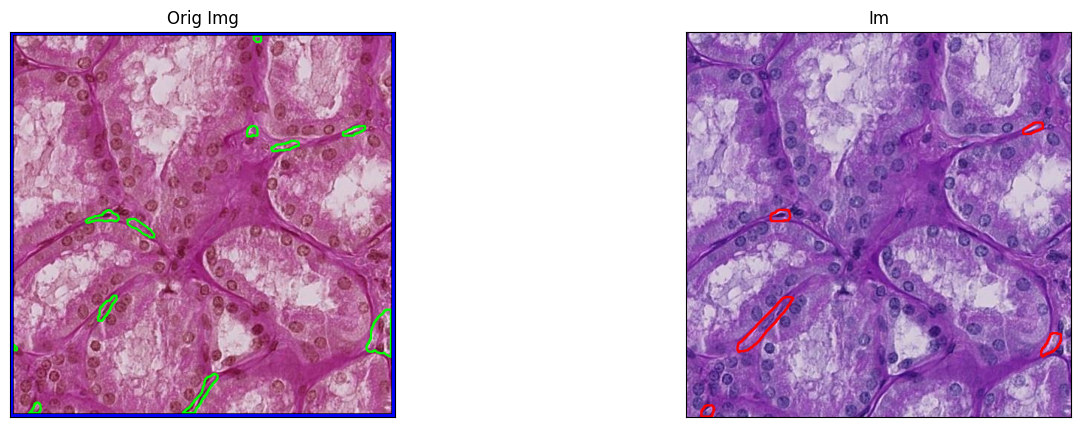


image 1/1 /home/ec2-user/hubmap-hacking-the-human-vasculature/project_yolo/../all_dataset_files/all_dataset_imgs/a36f233f5953.png: 512x512 44 blood vessels, 39.6ms
Speed: 3.1ms preprocess, 39.6ms inference, 31.6ms postprocess per image at shape (1, 3, 512, 512)


a36f233f5953


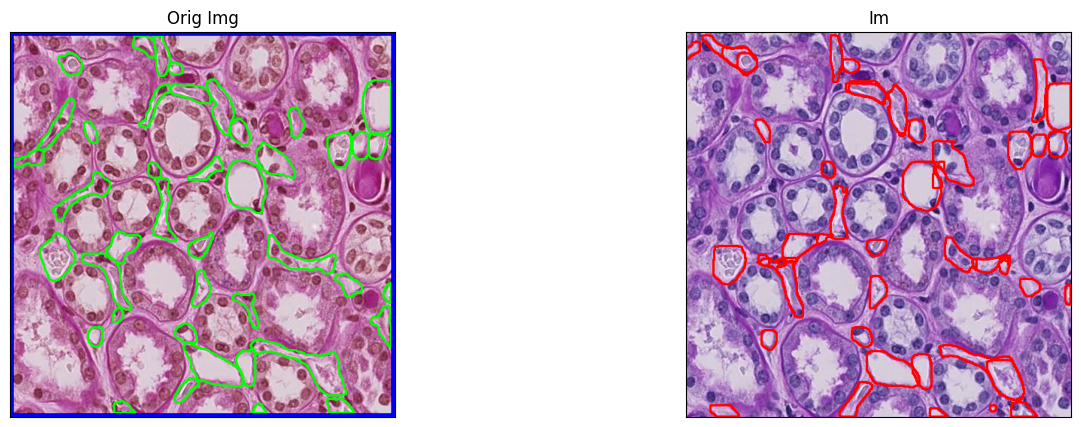


image 1/1 /home/ec2-user/hubmap-hacking-the-human-vasculature/project_yolo/../all_dataset_files/all_dataset_imgs/733296a59c9b.png: 512x512 10 blood vessels, 27.1ms
Speed: 1.4ms preprocess, 27.1ms inference, 13.7ms postprocess per image at shape (1, 3, 512, 512)


733296a59c9b


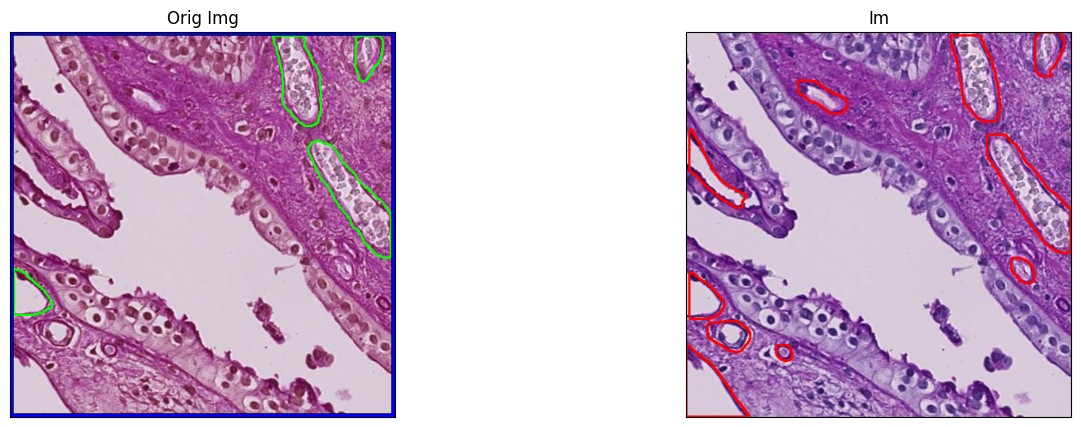


image 1/1 /home/ec2-user/hubmap-hacking-the-human-vasculature/project_yolo/../all_dataset_files/all_dataset_imgs/0754412b2917.png: 512x512 8 blood vessels, 23.3ms
Speed: 14.5ms preprocess, 23.3ms inference, 2.5ms postprocess per image at shape (1, 3, 512, 512)


0754412b2917


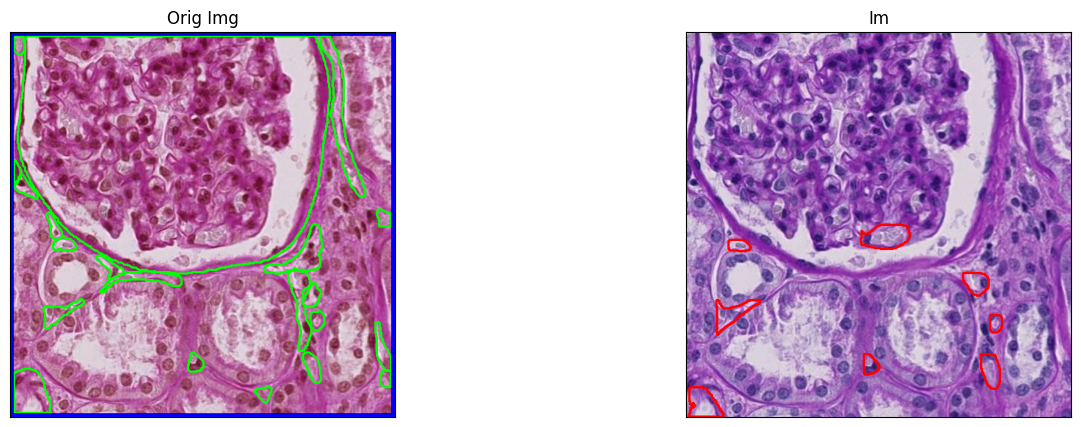


image 1/1 /home/ec2-user/hubmap-hacking-the-human-vasculature/project_yolo/../all_dataset_files/all_dataset_imgs/cbbdc5d83ec9.png: 512x512 7 blood vessels, 26.5ms
Speed: 1.6ms preprocess, 26.5ms inference, 3.1ms postprocess per image at shape (1, 3, 512, 512)


cbbdc5d83ec9


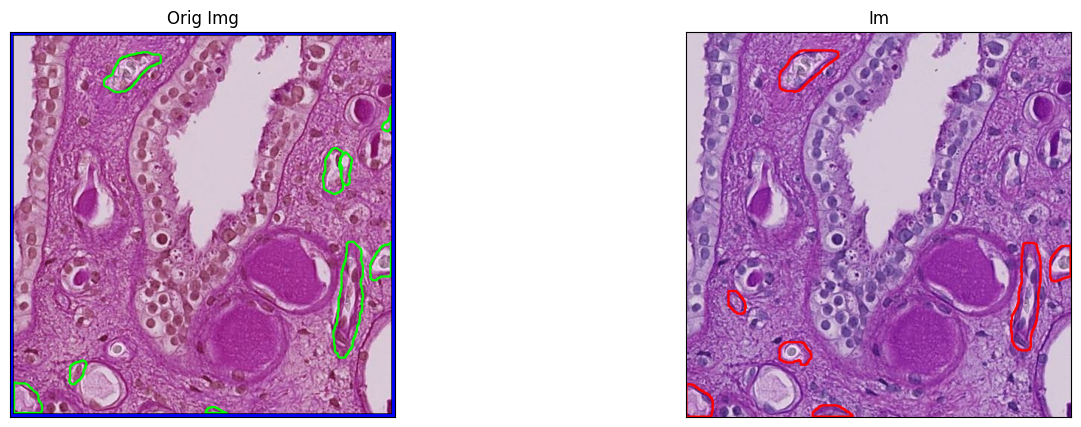


image 1/1 /home/ec2-user/hubmap-hacking-the-human-vasculature/project_yolo/../all_dataset_files/all_dataset_imgs/da774b6f9cd1.png: 512x512 25 blood vessels, 33.1ms
Speed: 1.4ms preprocess, 33.1ms inference, 19.0ms postprocess per image at shape (1, 3, 512, 512)


da774b6f9cd1


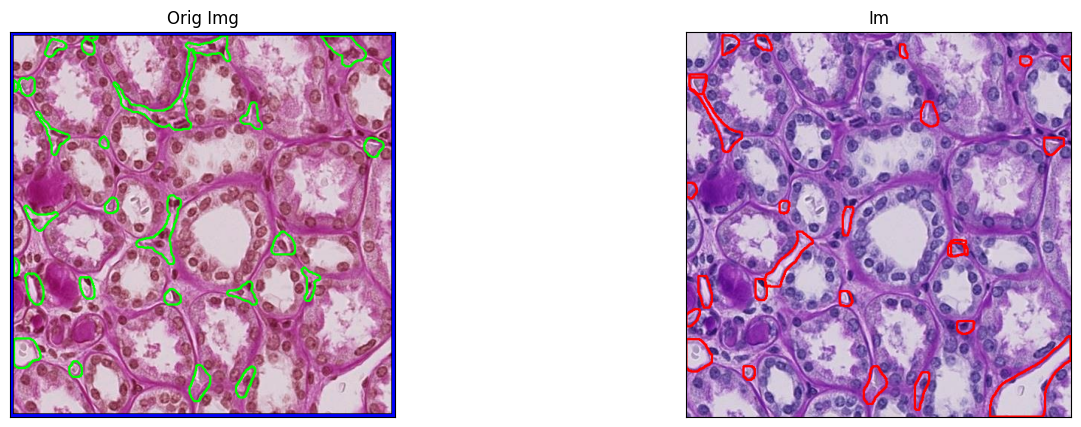


image 1/1 /home/ec2-user/hubmap-hacking-the-human-vasculature/project_yolo/../all_dataset_files/all_dataset_imgs/cd9a241fd4b6.png: 512x512 19 blood vessels, 21.9ms
Speed: 1.5ms preprocess, 21.9ms inference, 4.1ms postprocess per image at shape (1, 3, 512, 512)


cd9a241fd4b6


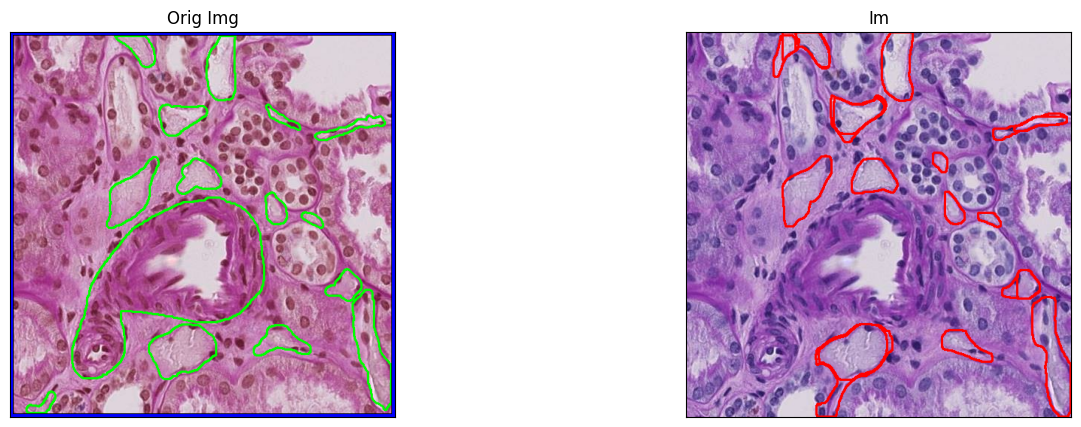


image 1/1 /home/ec2-user/hubmap-hacking-the-human-vasculature/project_yolo/../all_dataset_files/all_dataset_imgs/d92dc34cd8f2.png: 512x512 3 blood vessels, 13.8ms
Speed: 1.3ms preprocess, 13.8ms inference, 2.3ms postprocess per image at shape (1, 3, 512, 512)


d92dc34cd8f2


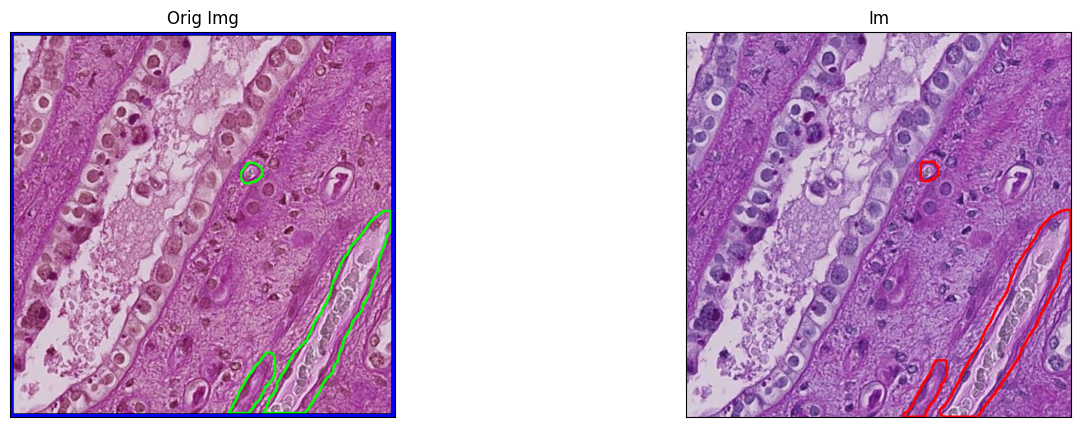


image 1/1 /home/ec2-user/hubmap-hacking-the-human-vasculature/project_yolo/../all_dataset_files/all_dataset_imgs/d1d485660263.png: 512x512 4 blood vessels, 13.8ms
Speed: 1.1ms preprocess, 13.8ms inference, 2.0ms postprocess per image at shape (1, 3, 512, 512)


d1d485660263


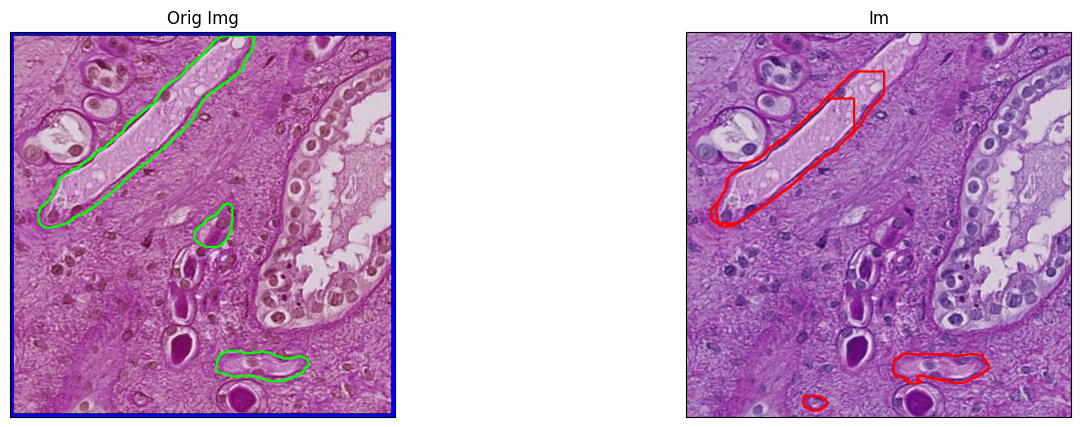


image 1/1 /home/ec2-user/hubmap-hacking-the-human-vasculature/project_yolo/../all_dataset_files/all_dataset_imgs/ca178713fdb2.png: 512x512 8 blood vessels, 13.8ms
Speed: 1.1ms preprocess, 13.8ms inference, 1.9ms postprocess per image at shape (1, 3, 512, 512)


ca178713fdb2


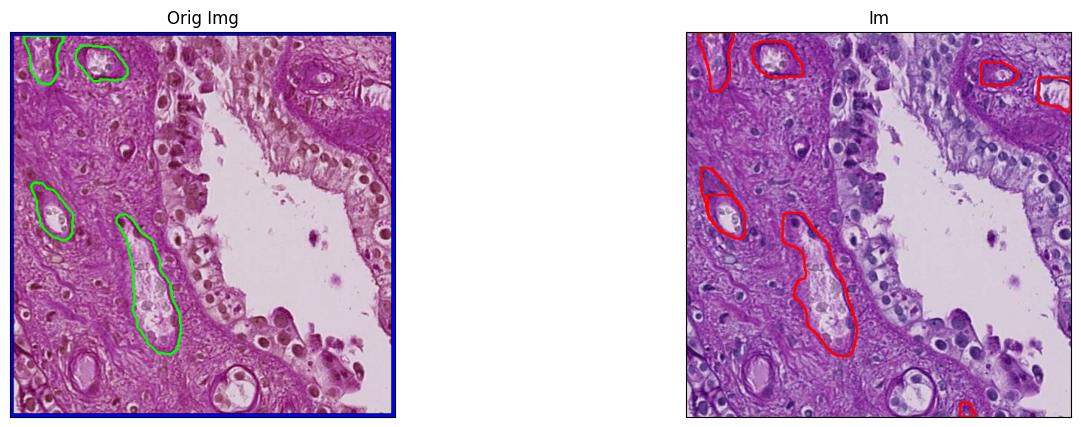

In [48]:
import pickle
import matplotlib.pyplot as plt
dataset2_imgs = os.listdir(f'{base_path}/dataset1_files/all_dataset1_imgs_train_0')
i=5
for i in range(1):
    tgt_img_id = dataset2_imgs[i].split('.png')[0]
    print(tgt_img_id)
    orig_img = get_annotated_img(f'{base_path}/all_dataset_files/all_dataset_imgs', f'{base_path}/all_dataset_files/all_dataset_annotations', tgt_img_id, fill_outline=True)
    # img_mask = cv2.imread(f'{base_path}/dataset1_files/all_dataset1_masks_merged_{train_mode}_{i}/{tgt_img_id}.png', cv2.IMREAD_GRAYSCALE)
    results = model.predict(f'{base_path}/all_dataset_files/all_dataset_imgs/{tgt_img_id}.png', conf=0.001)
    for result in results:
        boxes = result.boxes  # Boxes object for bbox outputs
        masks = result.masks  # Masks object for segmentation masks outputs
    im = cv2.imread(f'{base_path}/all_dataset_files/all_dataset_imgs/{tgt_img_id}.png')
    for i in range(len(boxes)):
      conf = boxes[i].conf
      box_coords = boxes[i].xyxy[0].cpu().numpy().astype('int32')
#       cv2.drawContours(im, [masks[i].xy[0].astype('int32')], 0, (255,0,0), -1)
      cv2.polylines(im, [masks[i].xy[0].astype('int32')], True, (255, 0, 0), 2)
#       print(masks[i])
#       print(masks[i].data.squeeze().cpu().numpy().shape)
#       plt.imshow(masks[i].data.squeeze().cpu().numpy())
#       plt.show()
#       cv2.rectangle(im, (box_coords[0], box_coords[1]), (box_coords[2], box_coords[3]), (0,255,0), thickness=2)
    img_dict = {'orig_img': orig_img, 'im': im}
    visualize(**img_dict)
    plt.show()

In [ ]:
metrics = model.val(verbose=True)

In [ ]:
metrics